In [50]:
from sources.binomialtree import BinomialTree 
from sources.plotter import Plotter 
import numpy as np

r = 0.048  # riskless rate
sigma = 0.05  # annual volatility of underlying
stock_price = 100
strike = stock_price
T = 1
trading_days = 252

European Call Option Price: 5.12
European Put Option Price: 0.44
American Call Option Price: 5.12
American Put Option Price: 0.85


In [51]:
binomial_tree = BinomialTree(stock_price= stock_price, strike_price=strike, risk_free_rate=r, volatility=sigma, maturity=T, steps=trading_days)

european_call = binomial_tree.run_binomialtree(option='european', option_type='call')
european_put = binomial_tree.run_binomialtree(option='european', option_type='put')

# Calculate prices for American options
american_call = binomial_tree.run_binomialtree(option='american', option_type='call')
american_put = binomial_tree.run_binomialtree(option='american', option_type='put')

# Print the calculated option prices
print(f"European Call Option Price: {european_call:.2f}")
print(f"European Put Option Price: {european_put:.2f}")
print(f"American Call Option Price: {american_call:.2f}")
print(f"American Put Option Price: {american_put:.2f}")

European Call Option Price: 5.12
European Put Option Price: 0.44
American Call Option Price: 5.12
American Put Option Price: 0.85


[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]


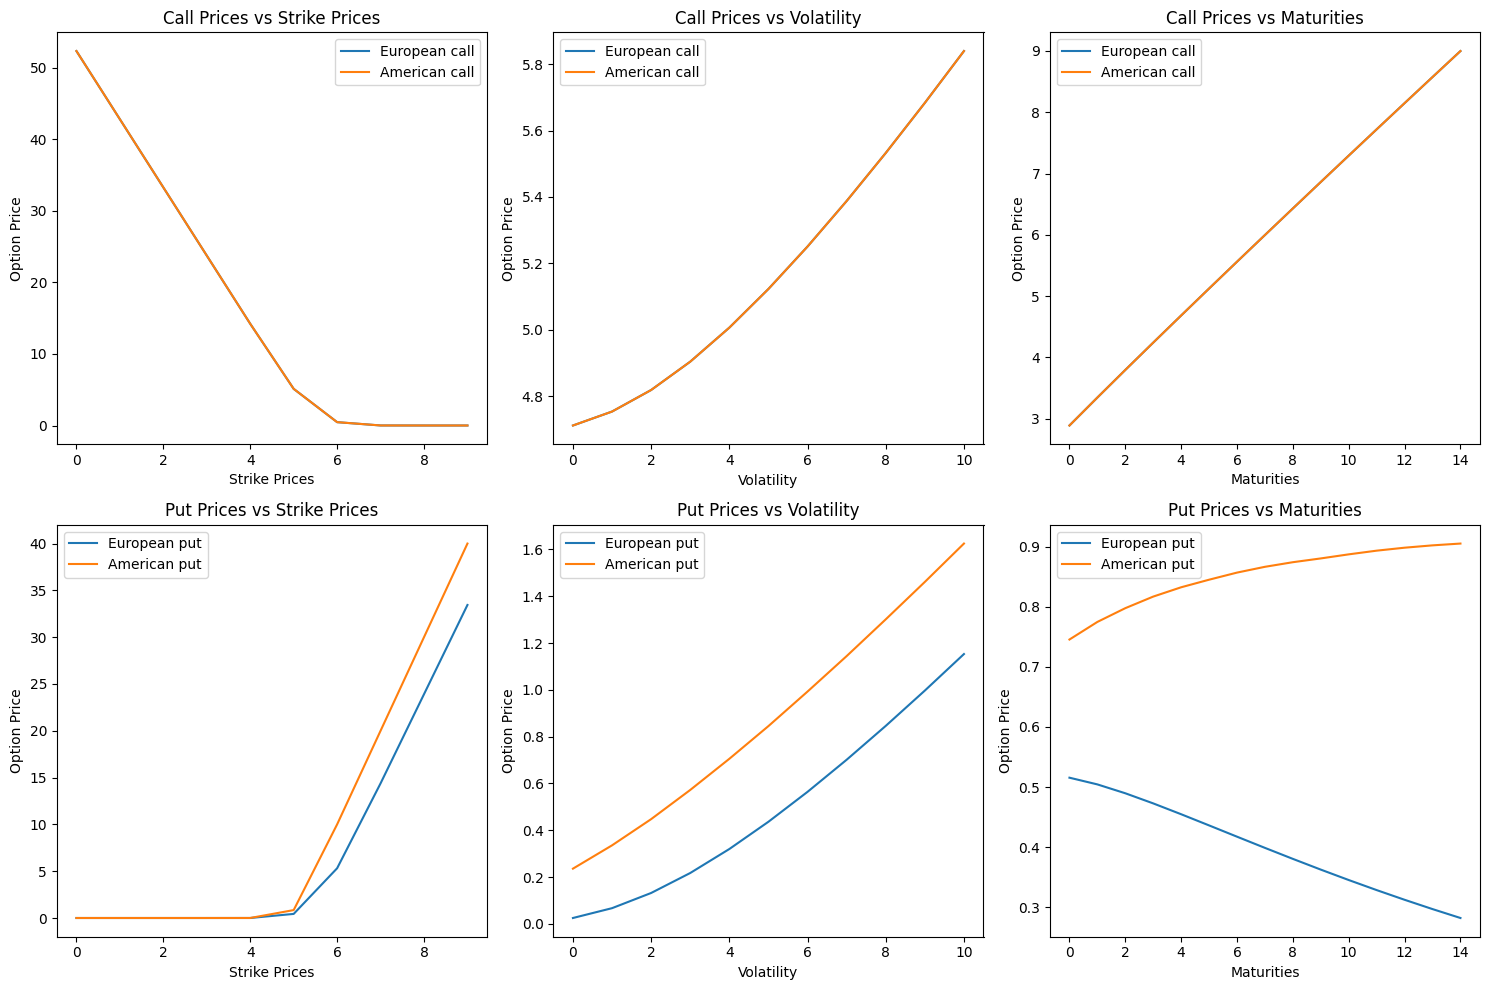

In [73]:
# Example usage
strike_prices = np.arange(stock_price/2, stock_price/2 + stock_price, 10)
volatilities = np.arange(sigma/2, sigma/2 + sigma, 0.005)
maturities = np.arange(T/2, 2, 0.1)
stock_price = 100
risk_free_rate = 0.048
steps = 252
plotter = Plotter(strike_prices, volatilities, maturities, stock_price, risk_free_rate, steps)
plotter.plot_all()

In a standard financial model, the price of an American call option on a non-dividend-paying stock should be the same as that of a European call option. This is because early exercise of a call option without dividends is never optimal due to the time value of money.

In the case of American put options, the holder has the right to exercise the option at any time before or at expiration. This early exercise feature can be valuable, especially in a falling market or when the underlying asset's price is far below the strike price. The ability to exercise early and sell the underlying asset at the higher strike price can lead to a higher value for American puts compared to European puts, which can only be exercised at expiration.